# Alejandro Paredes La Torre

Yolo v8 implementation

In [ ]:
#https://arxiv.org/pdf/2305.09972
#https://colab.research.google.com/github/roboflow-ai/notebooks/blob/main/notebooks/train-yolov8-object-detection-on-custom-dataset.ipynb#scrollTo=cSgnYS8833Ut
#https://blog.roboflow.com/how-to-train-yolov8-on-a-custom-dataset/
#https://www.youtube.com/watch?v=ce5PBam-V4Y
#https://www.youtube.com/watch?v=wuZtUMEiKWY



In [ ]:
import os
os.environ['PYTORCH_CUDA_ALLOC_CONF'] = 'expandable_segments:True'

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [ ]:
%cd {HOME}

/content


In [ ]:
# Pip install method (recommended)

!pip install ultralytics==8.2.103 -q

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()


from ultralytics import YOLO

from IPython.display import display, Image

Ultralytics YOLOv8.2.103 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (NVIDIA L4, 22700MiB)
Setup complete ✅ (12 CPUs, 53.0 GB RAM, 32.3/112.6 GB disk)


In [ ]:
!yolo task=detect mode=train model=yolov8s.pt data={'/content/drive/MyDrive/ColabNotebooks/Yolov8'}/data.yaml epochs=25 imgsz=800 plots=True

New https://pypi.org/project/ultralytics/8.3.18 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.2.103 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (NVIDIA L4, 22700MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/drive/MyDrive/ColabNotebooks/Yolov8/data.yaml, epochs=25, time=None, patience=100, batch=16, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, 

In [ ]:
!cp -r '/content/runs' '/content/drive/MyDrive/ColabNotebooks/Yolov8'

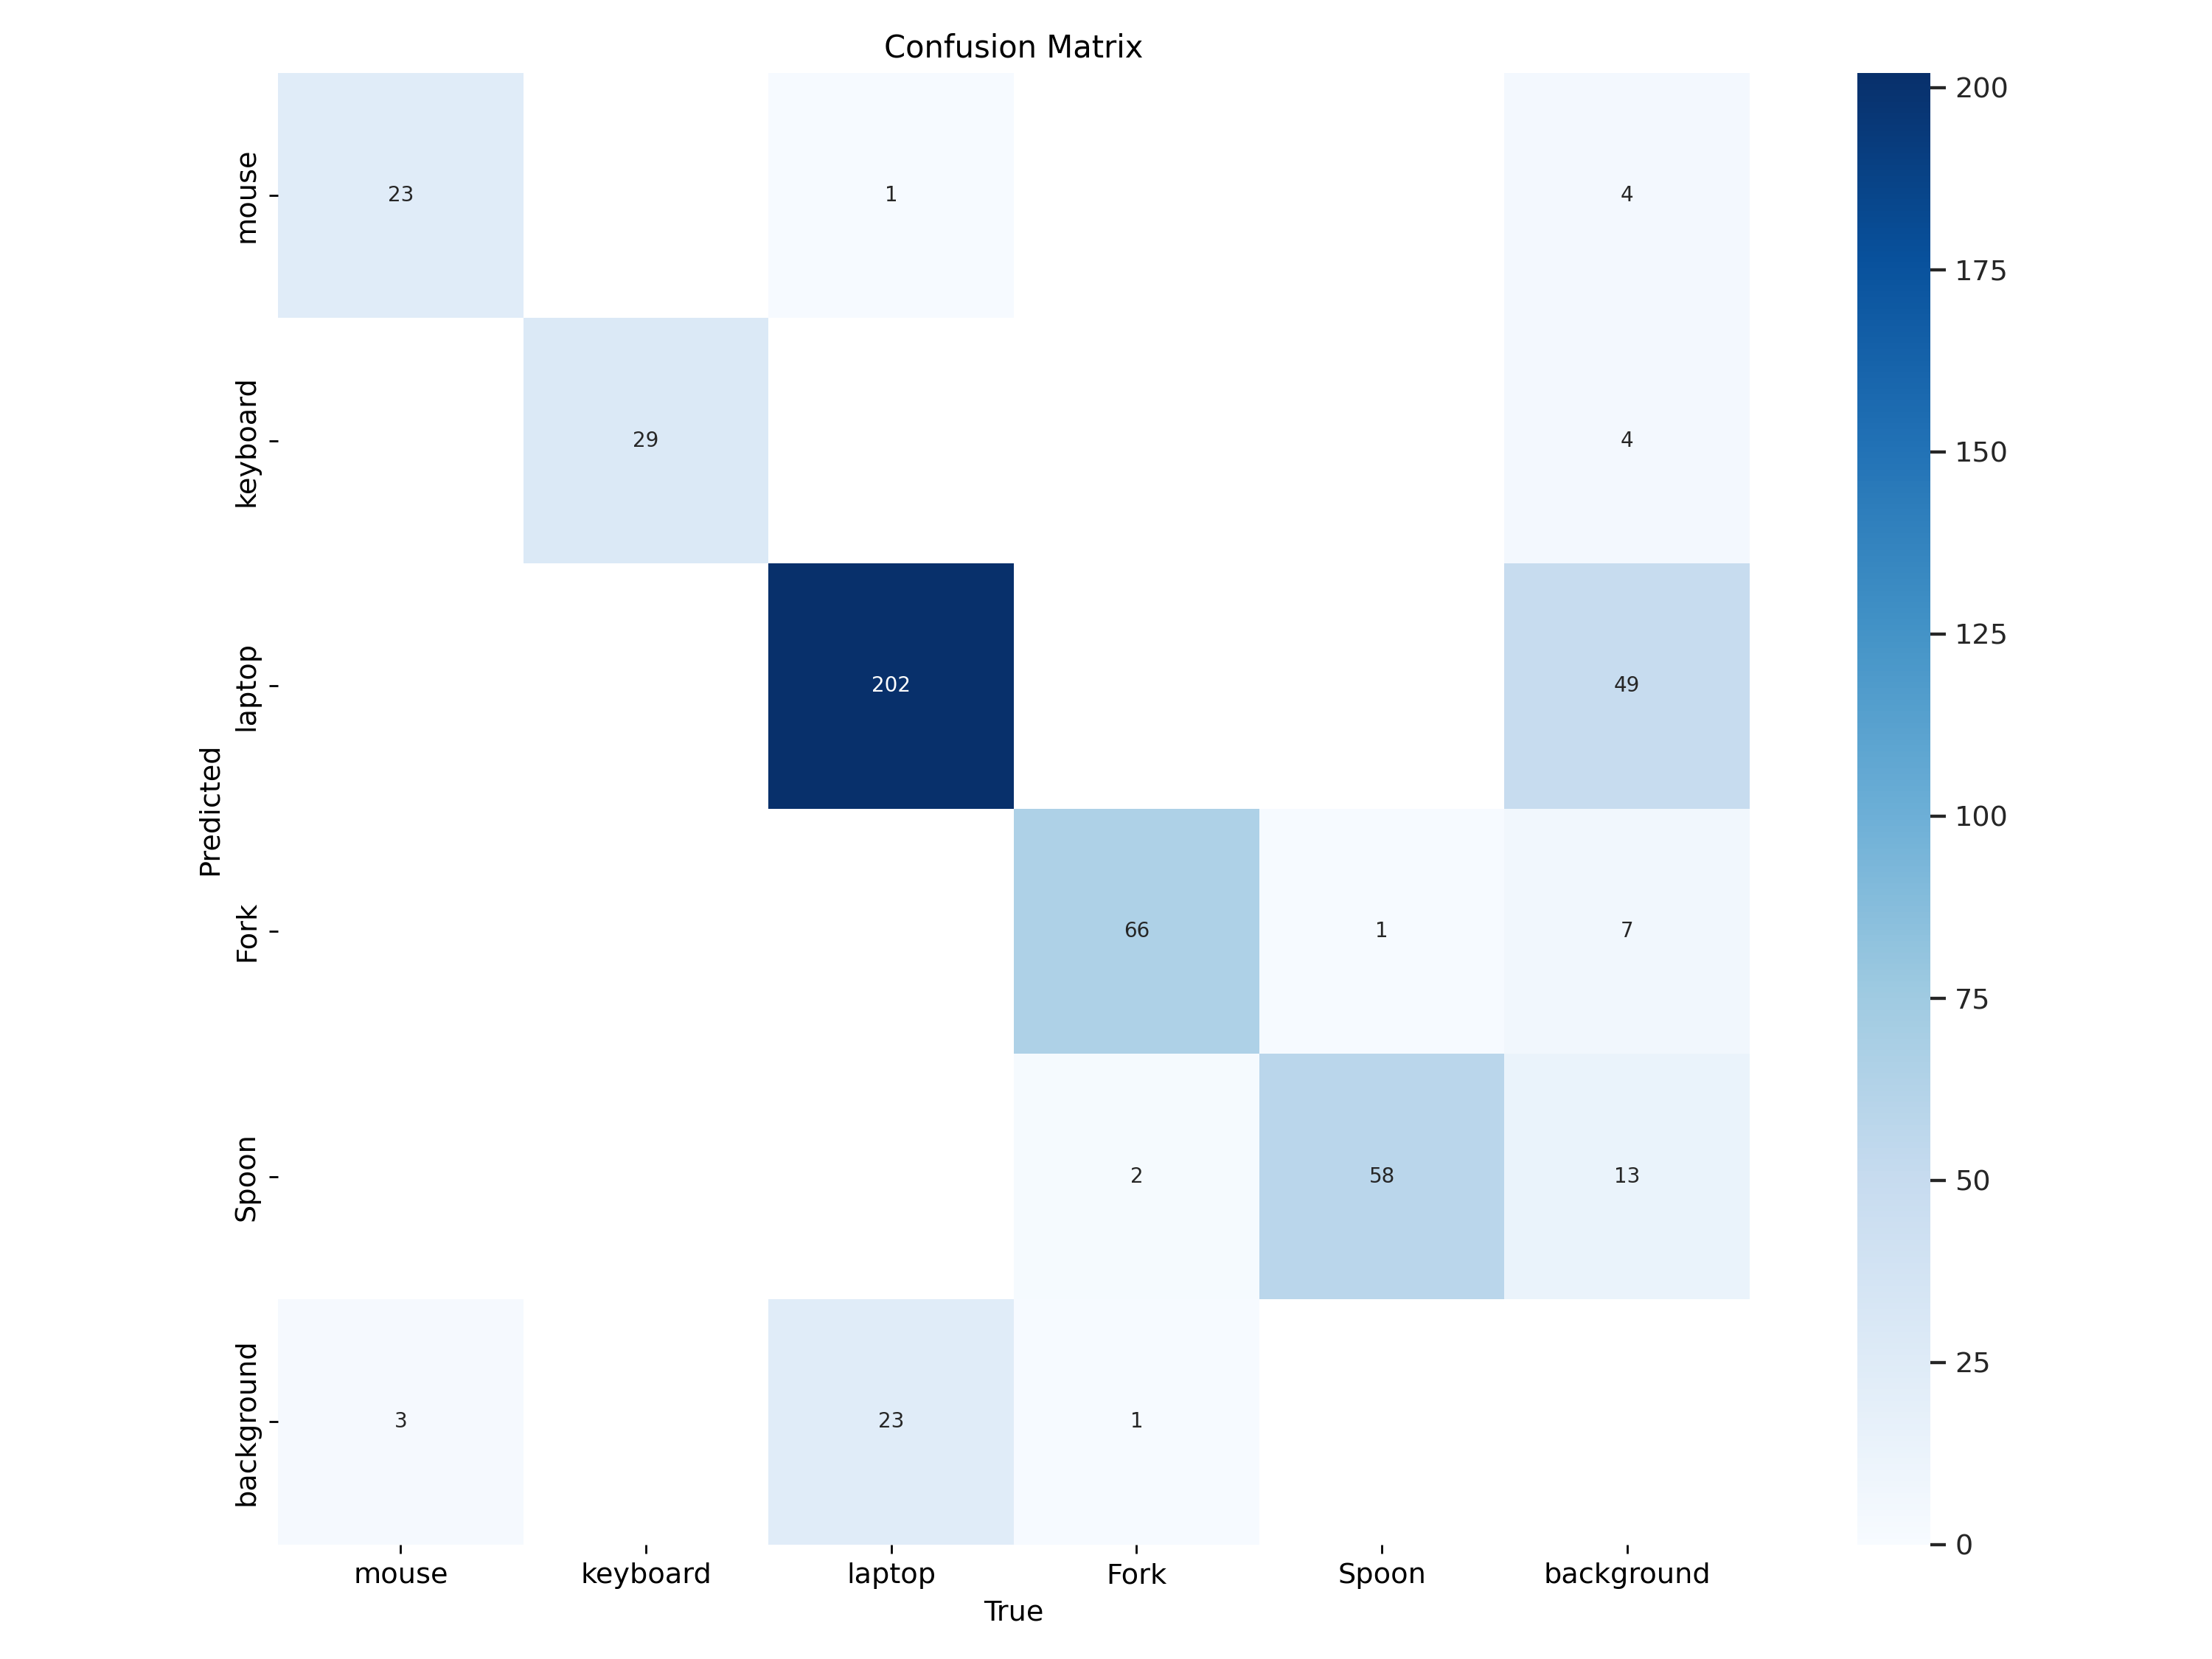

In [ ]:
Image(filename=f'/content/runs/detect/train2/confusion_matrix.png', width=600)

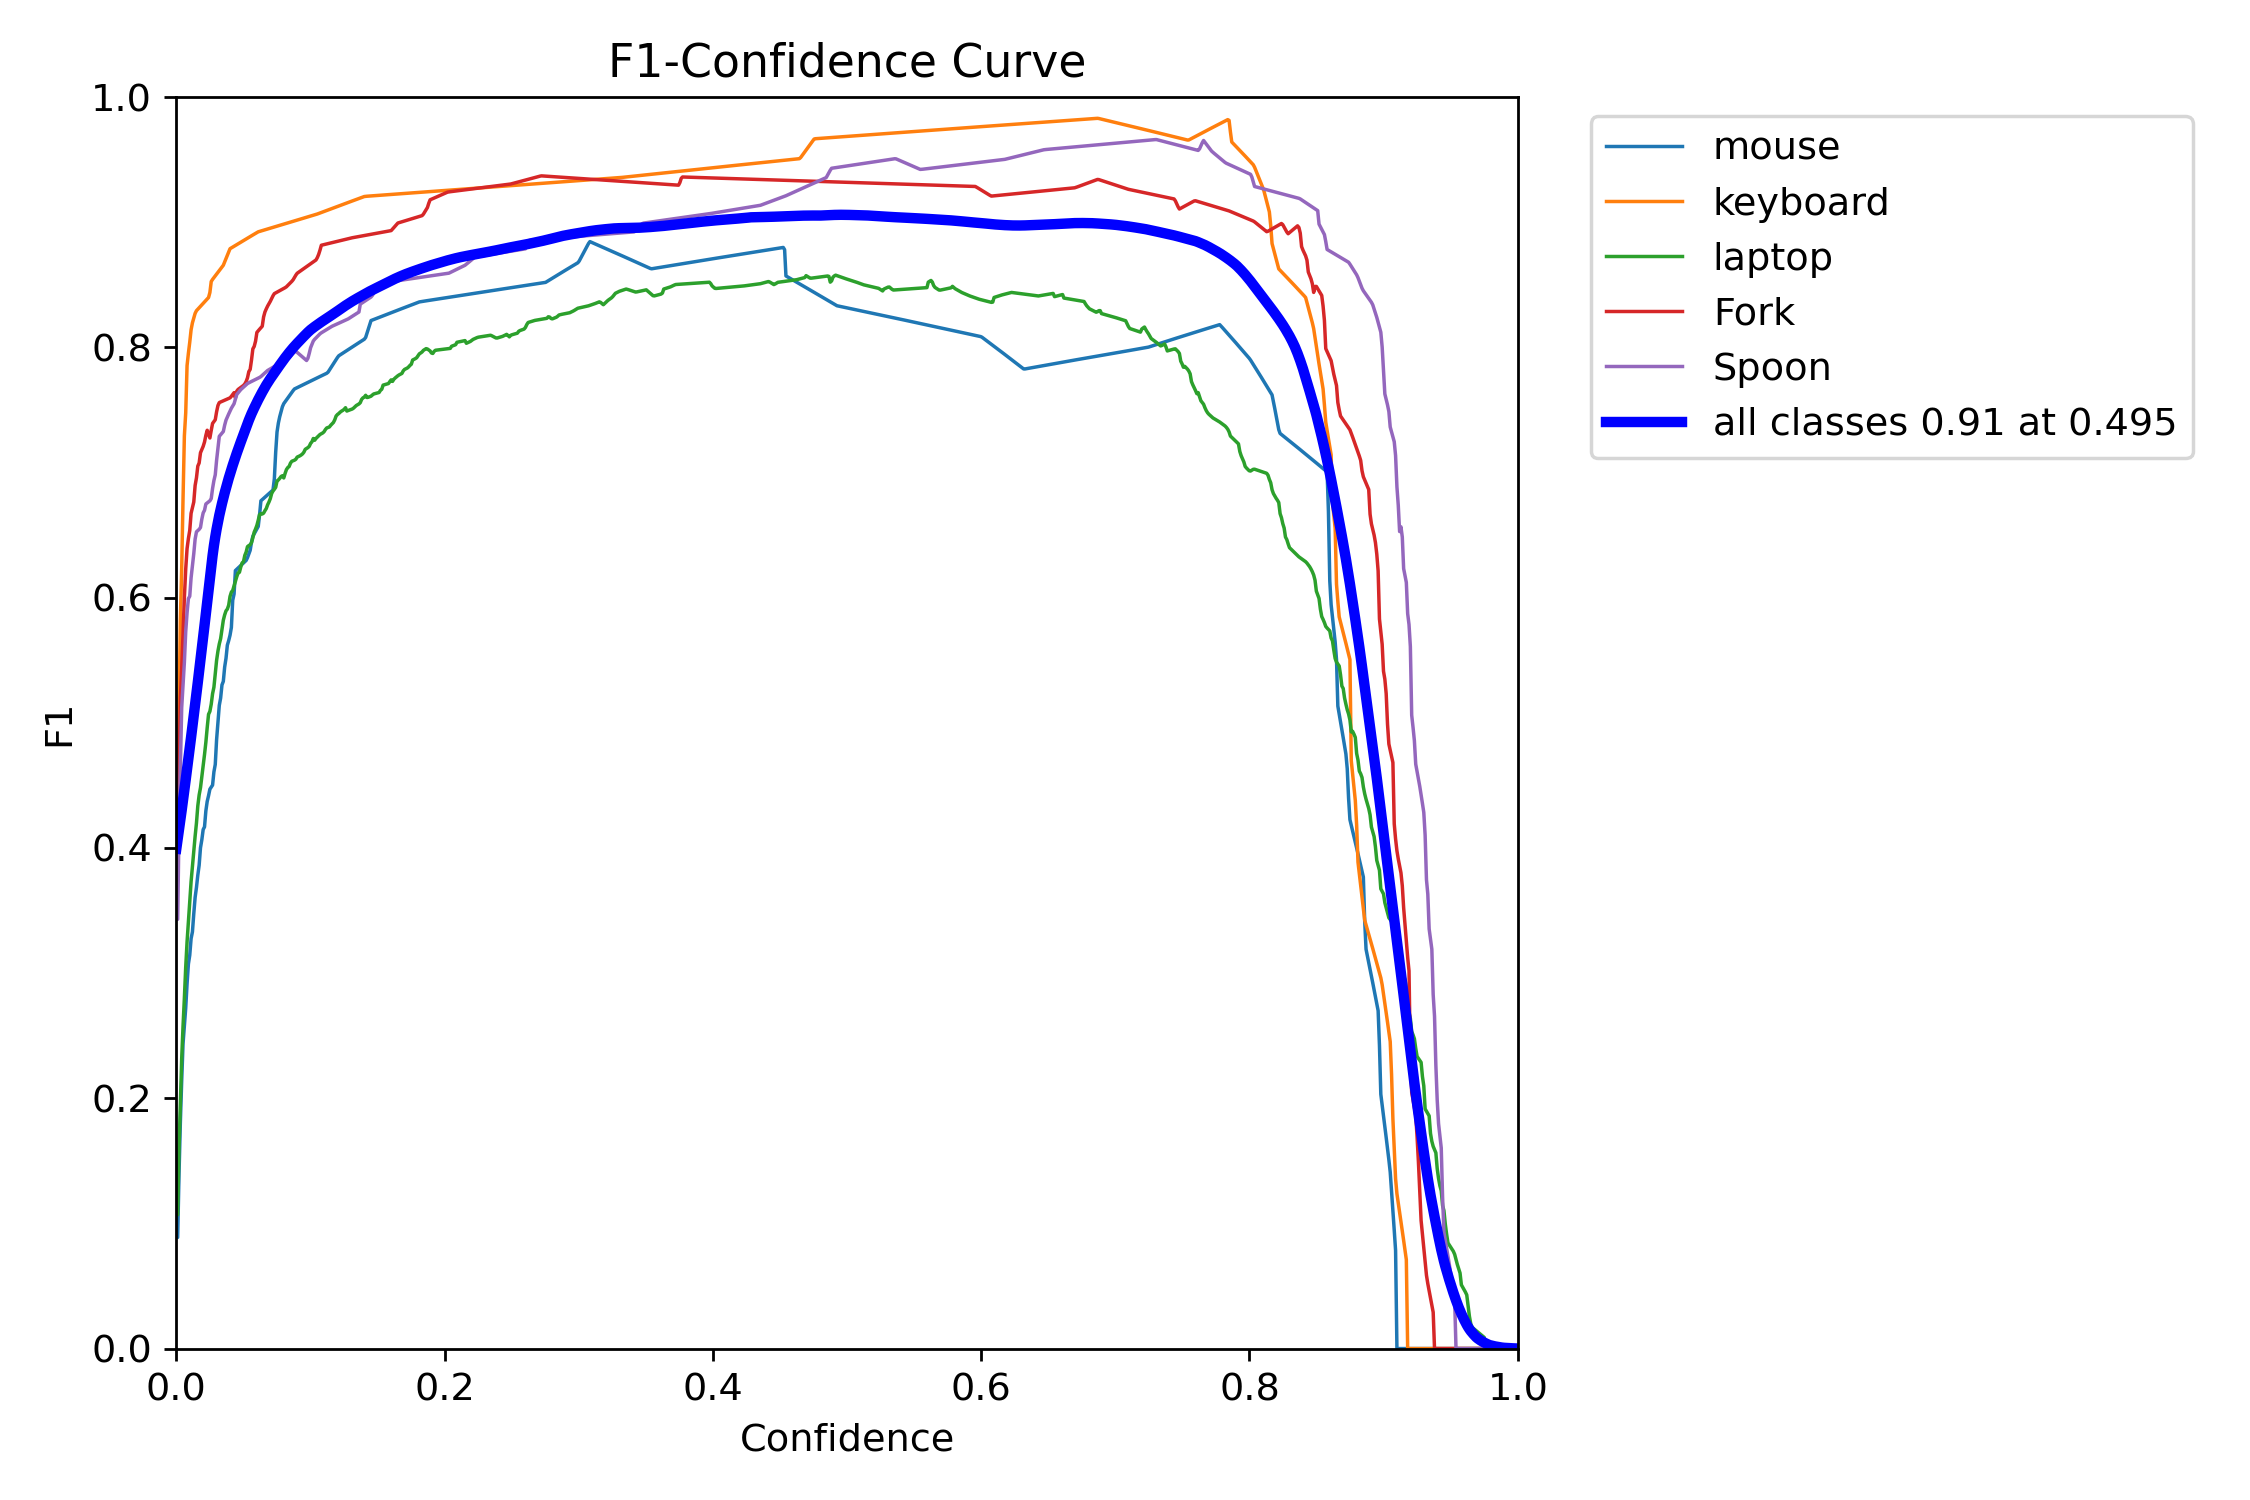

In [ ]:
Image(filename=f'/content/runs/detect/train2/F1_curve.png', width=600)

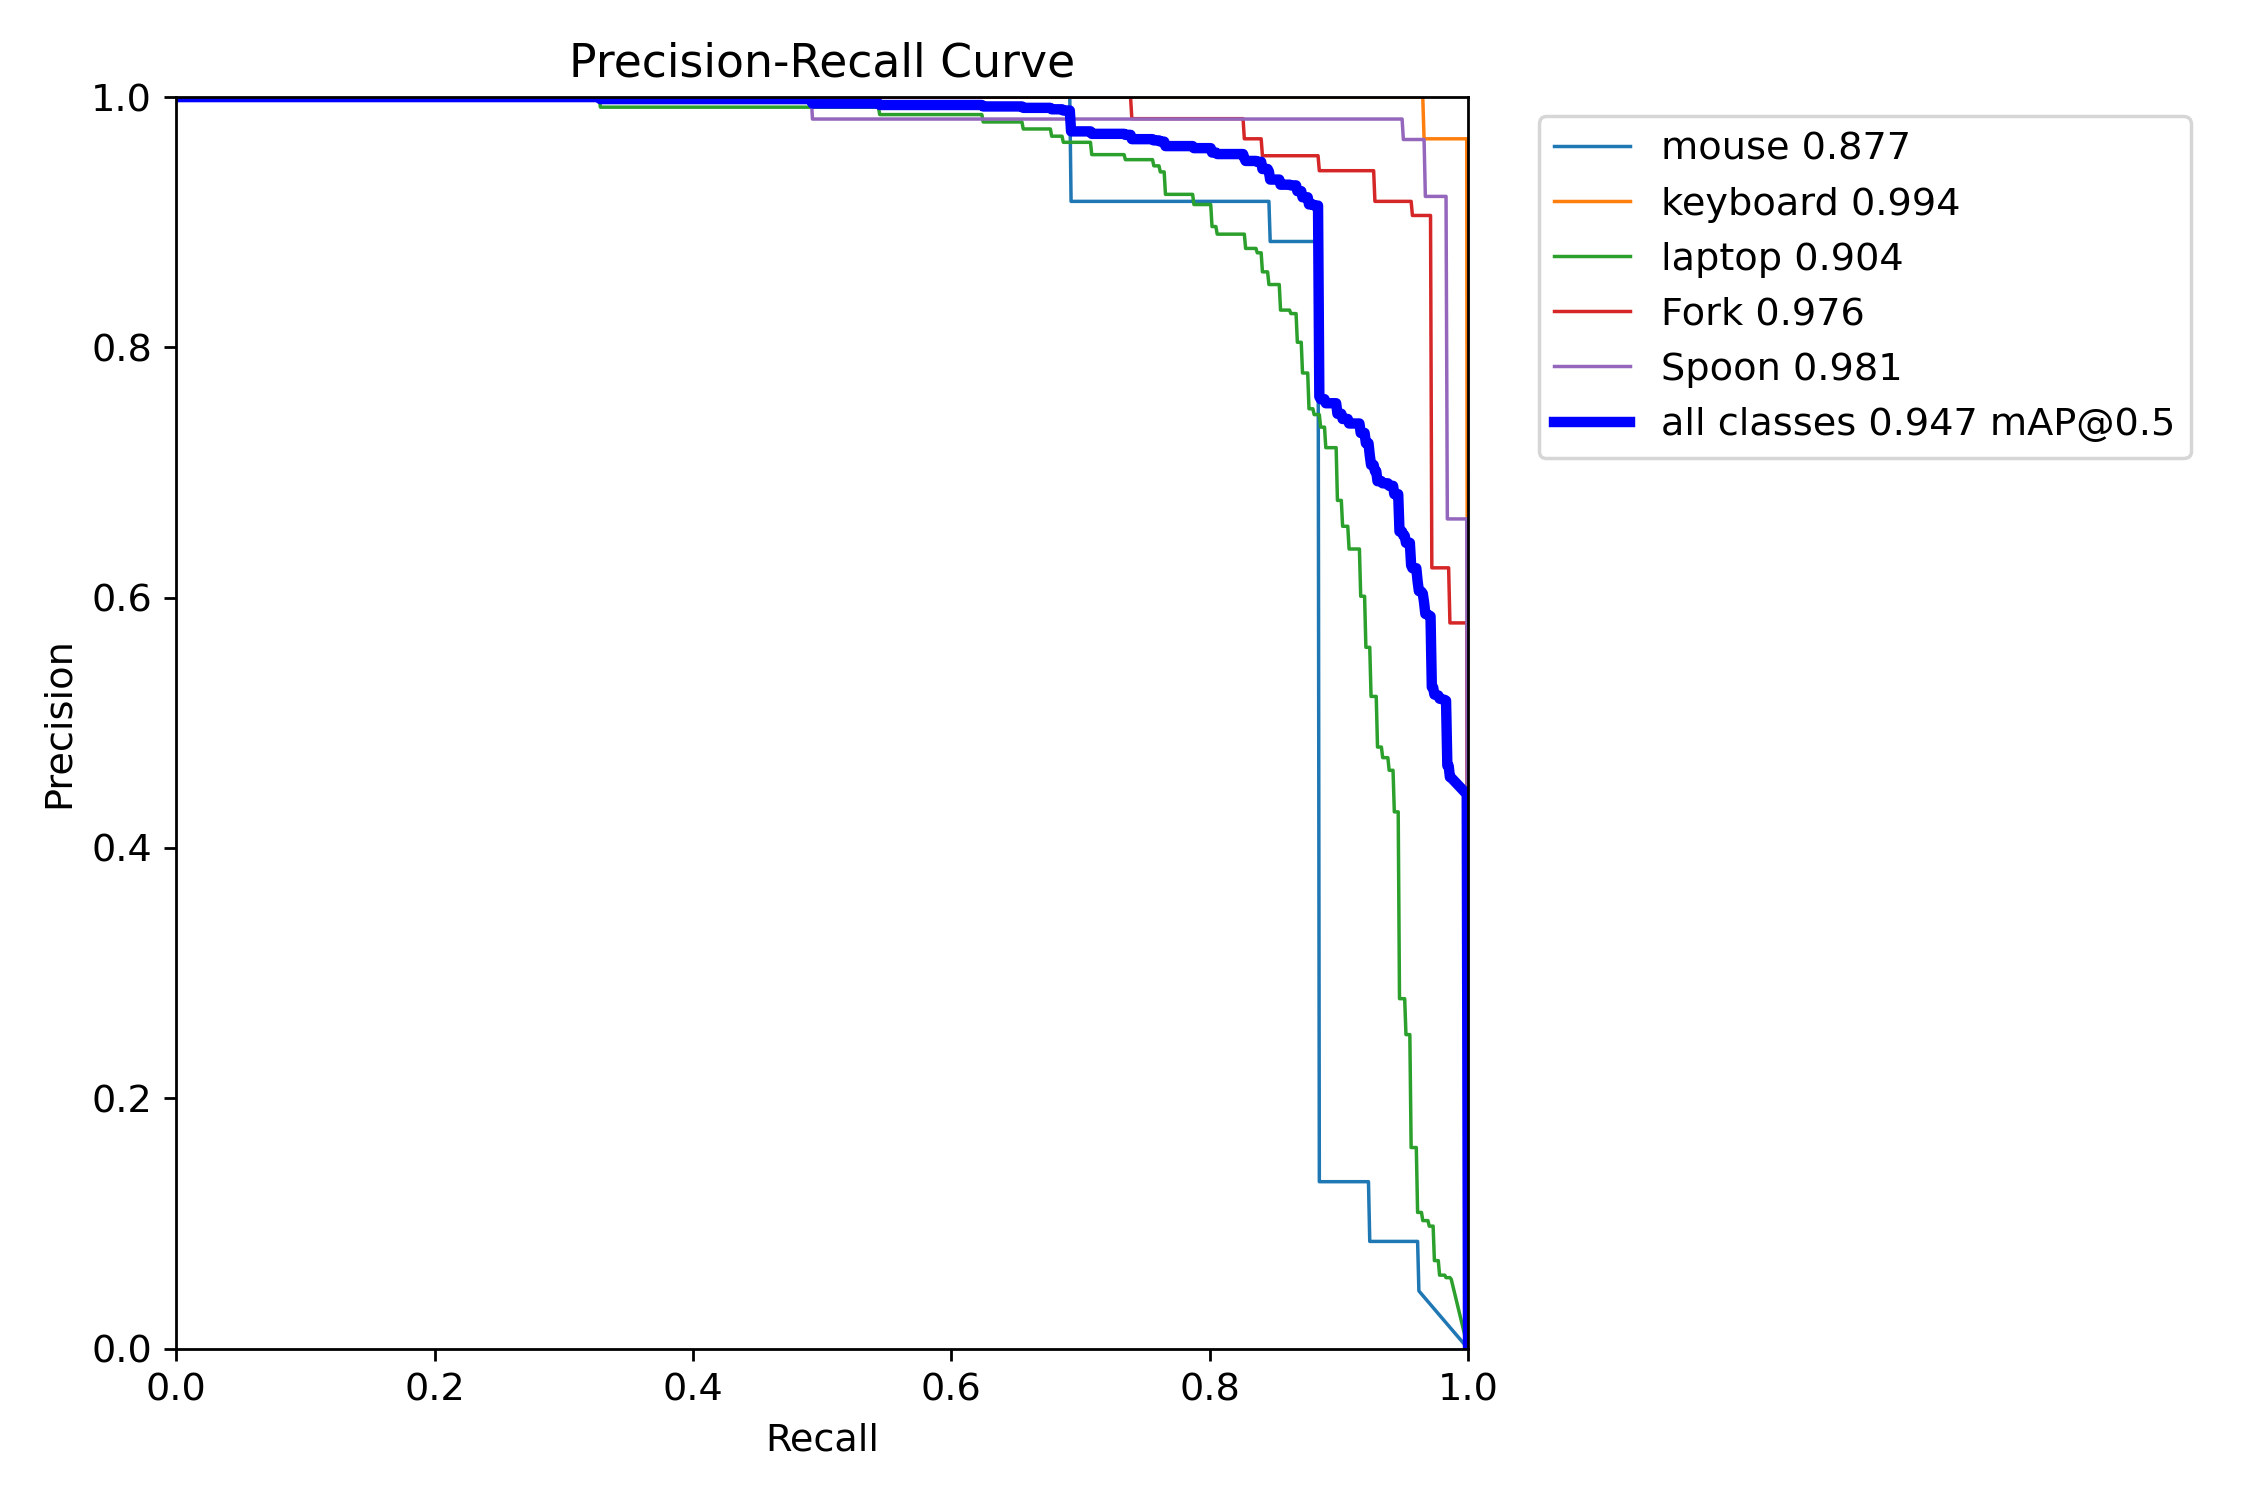

In [ ]:
Image(filename=f'/content/runs/detect/train2/PR_curve.png', width=600)

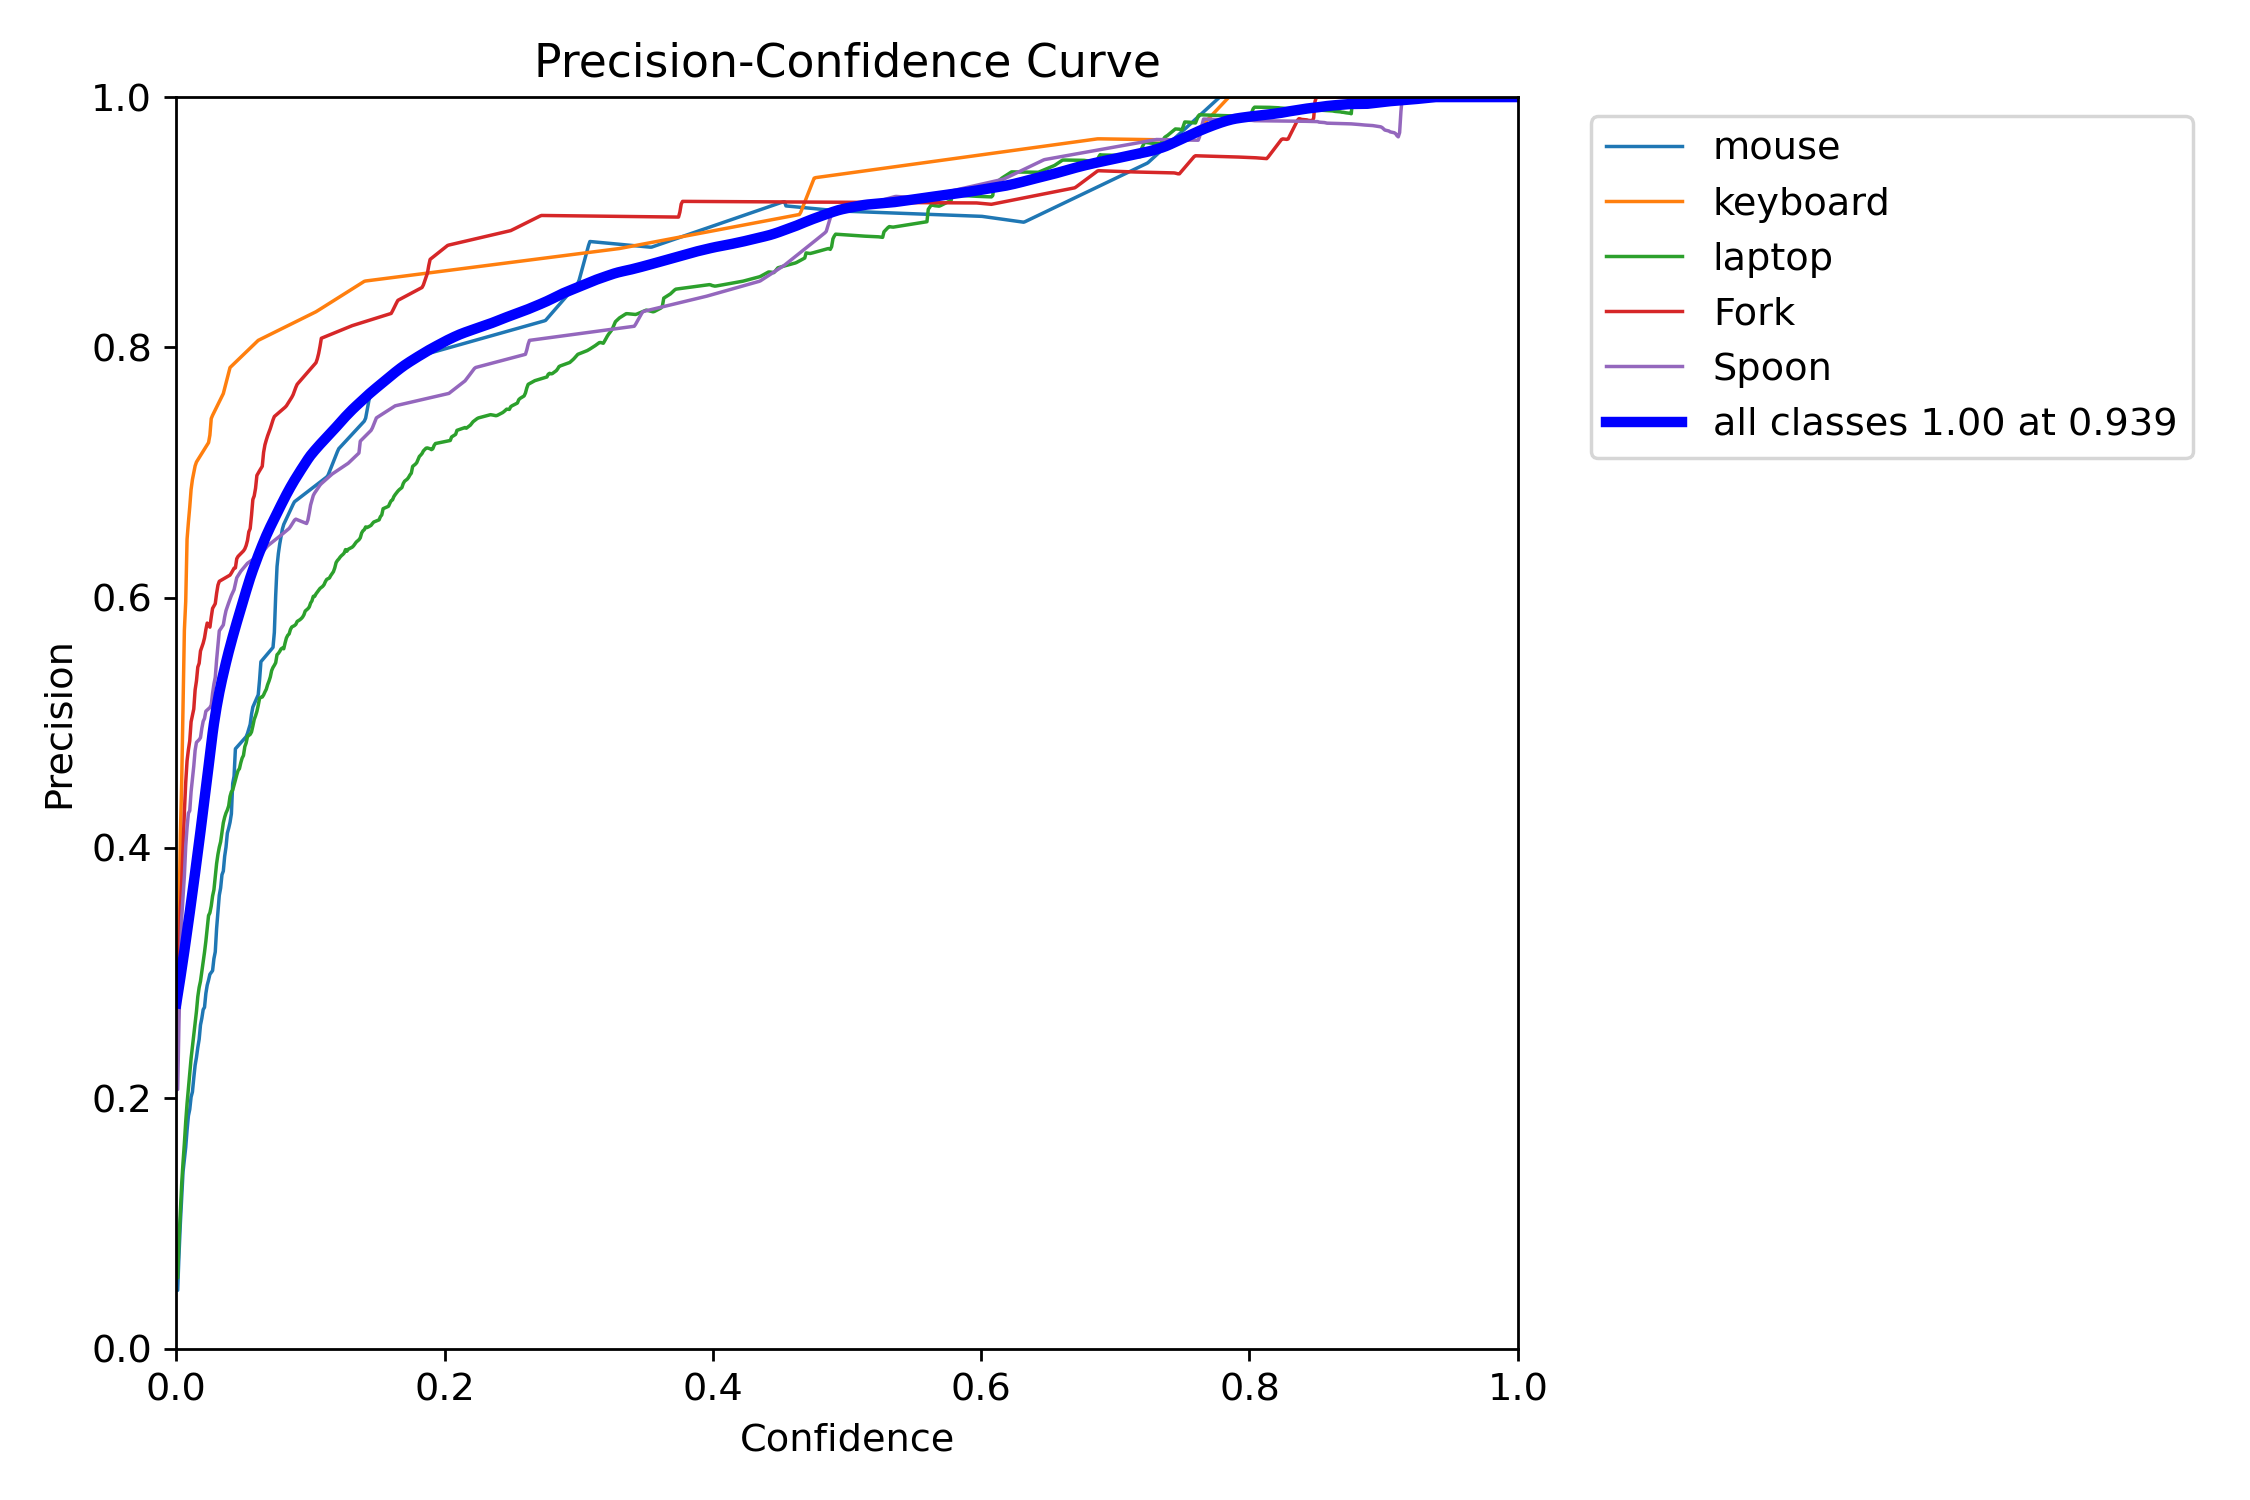

In [ ]:
Image(filename=f'/content/runs/detect/train2/P_curve.png', width=600)

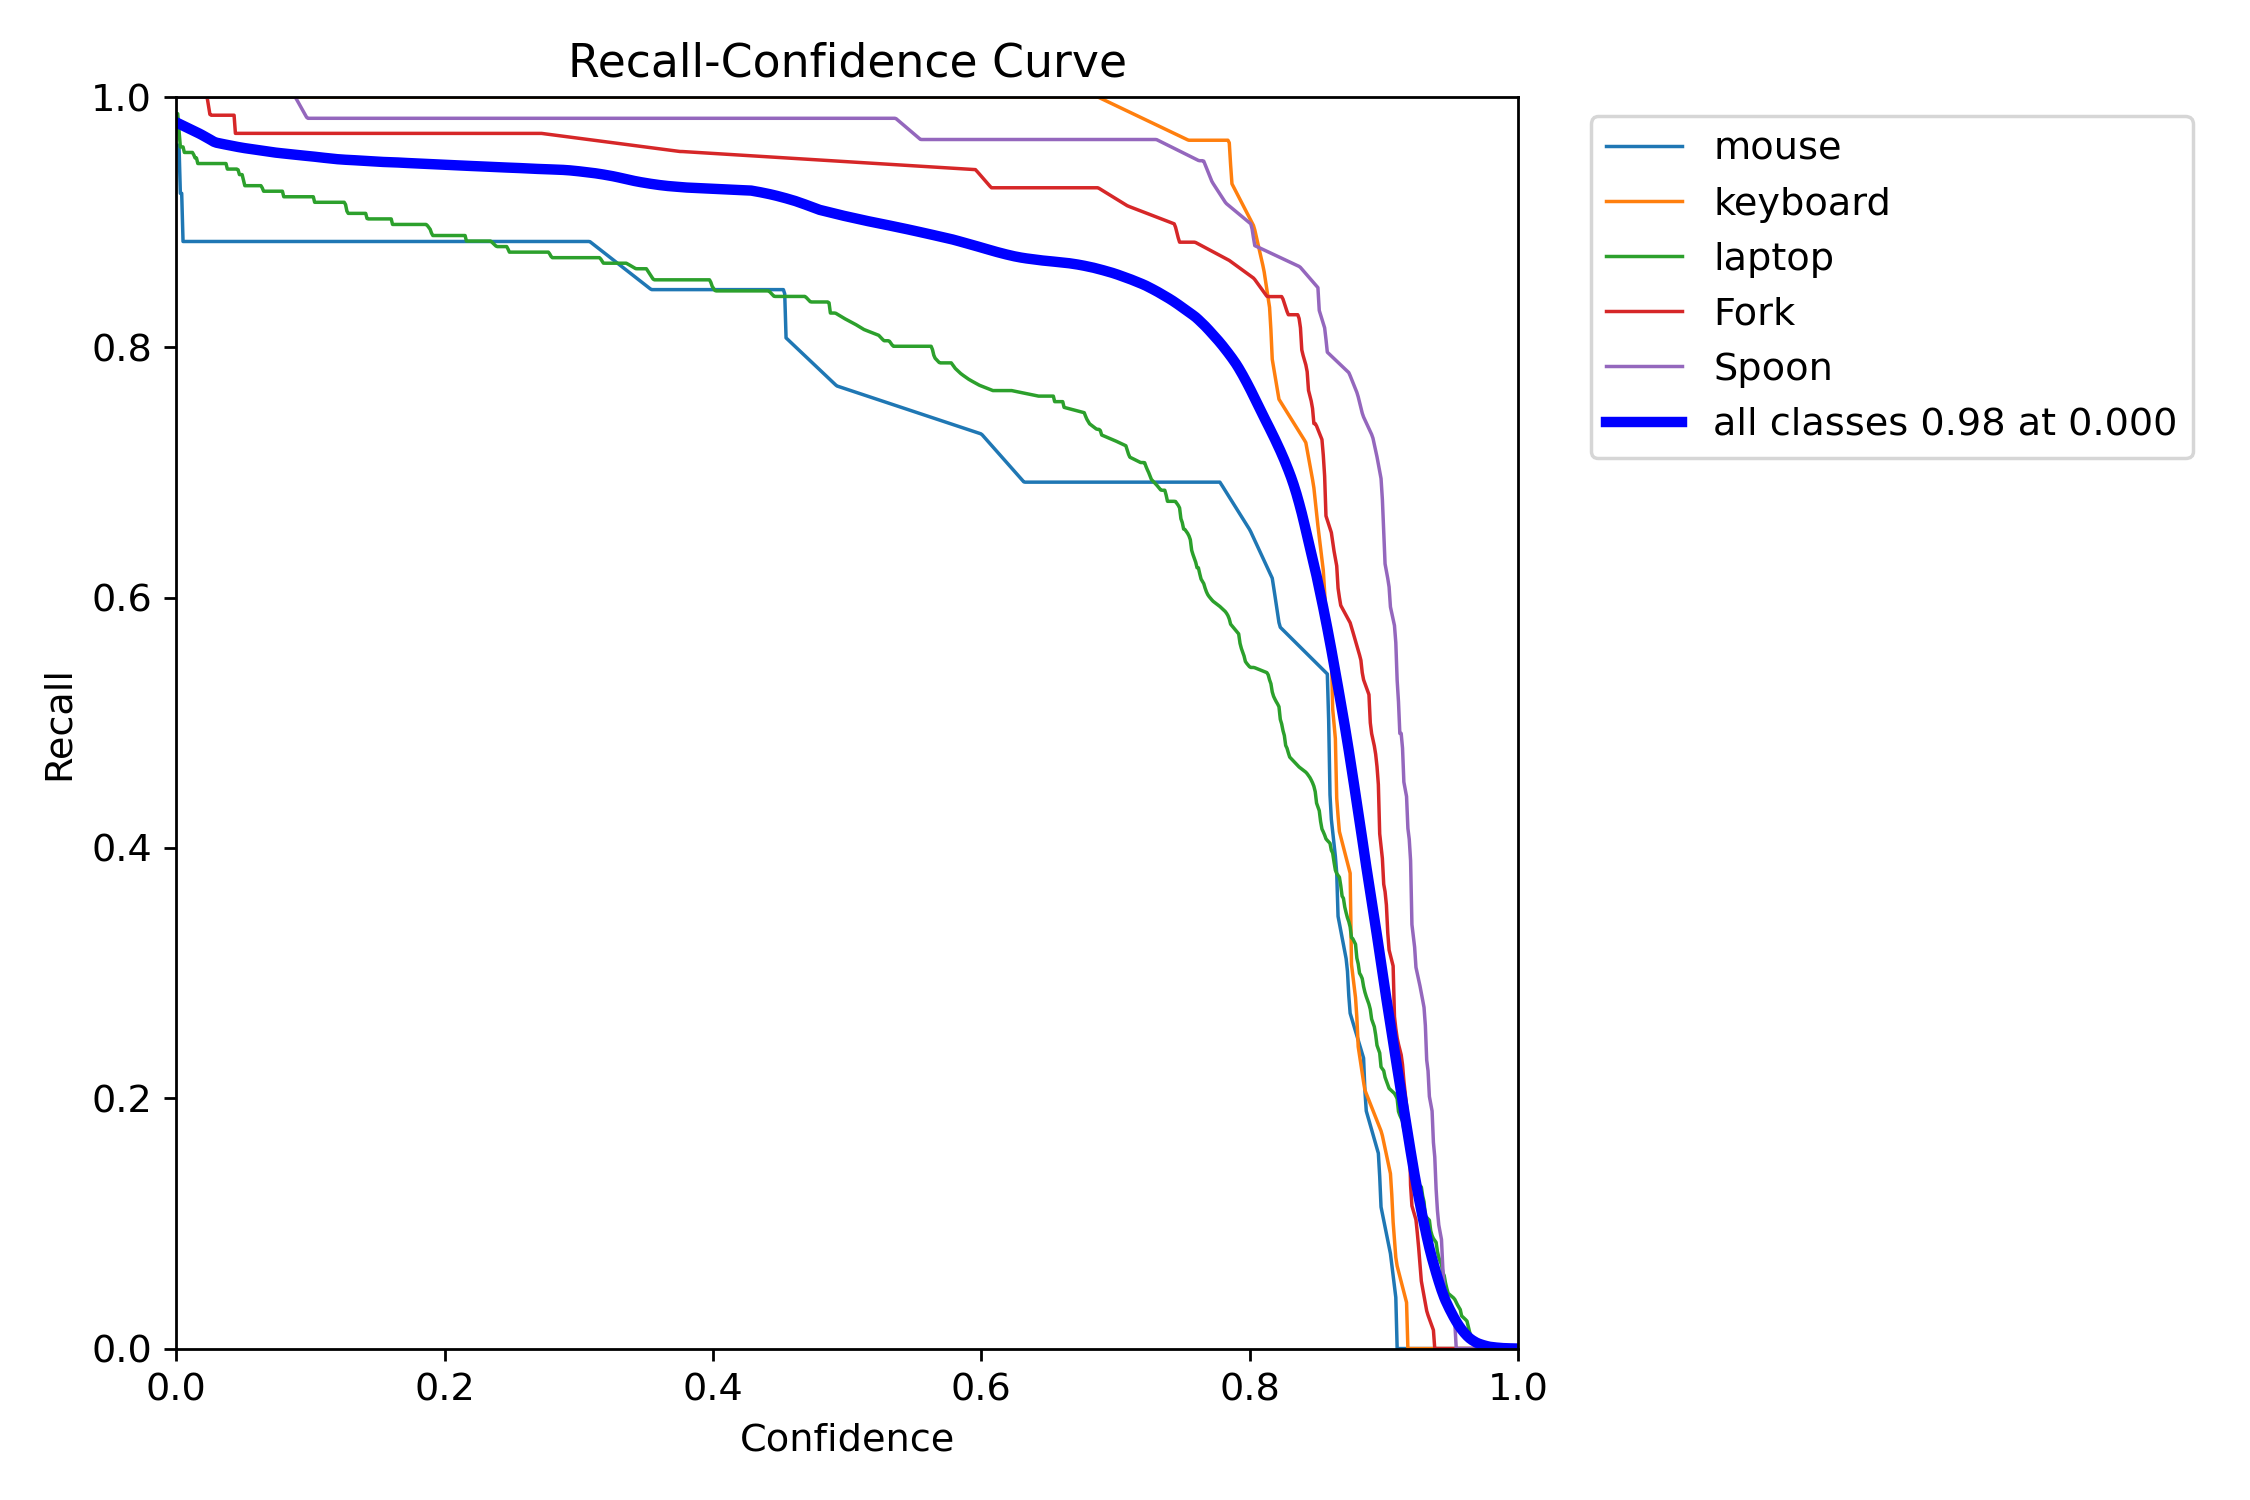

In [ ]:
Image(filename=f'/content/runs/detect/train2/R_curve.png', width=600)

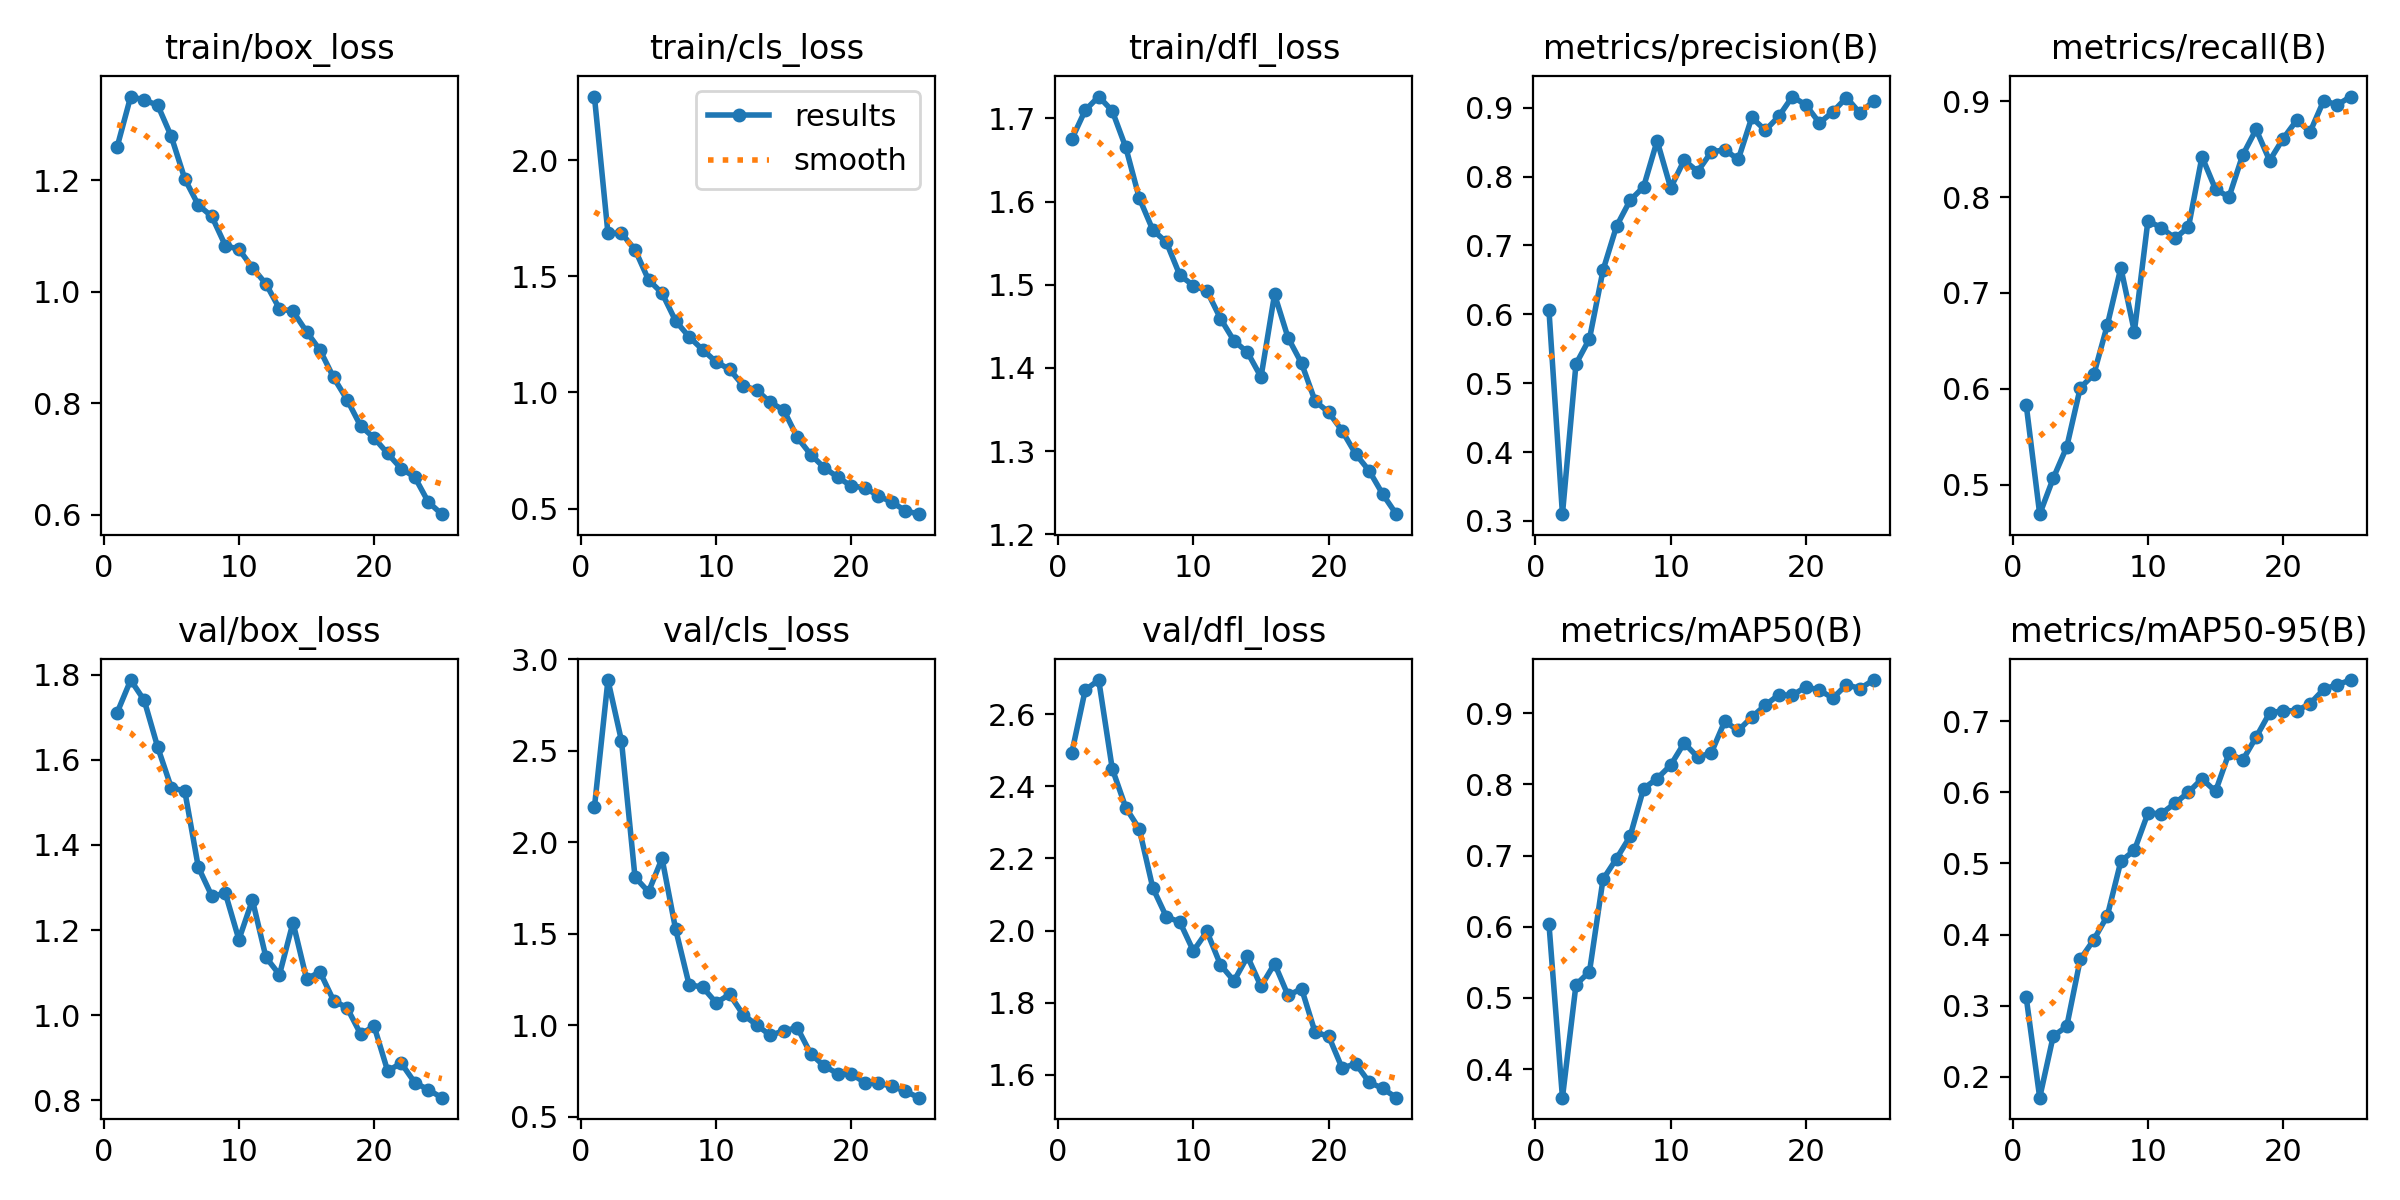

In [ ]:
Image(filename=f'./runs/detect/train2/results.png', width=600)

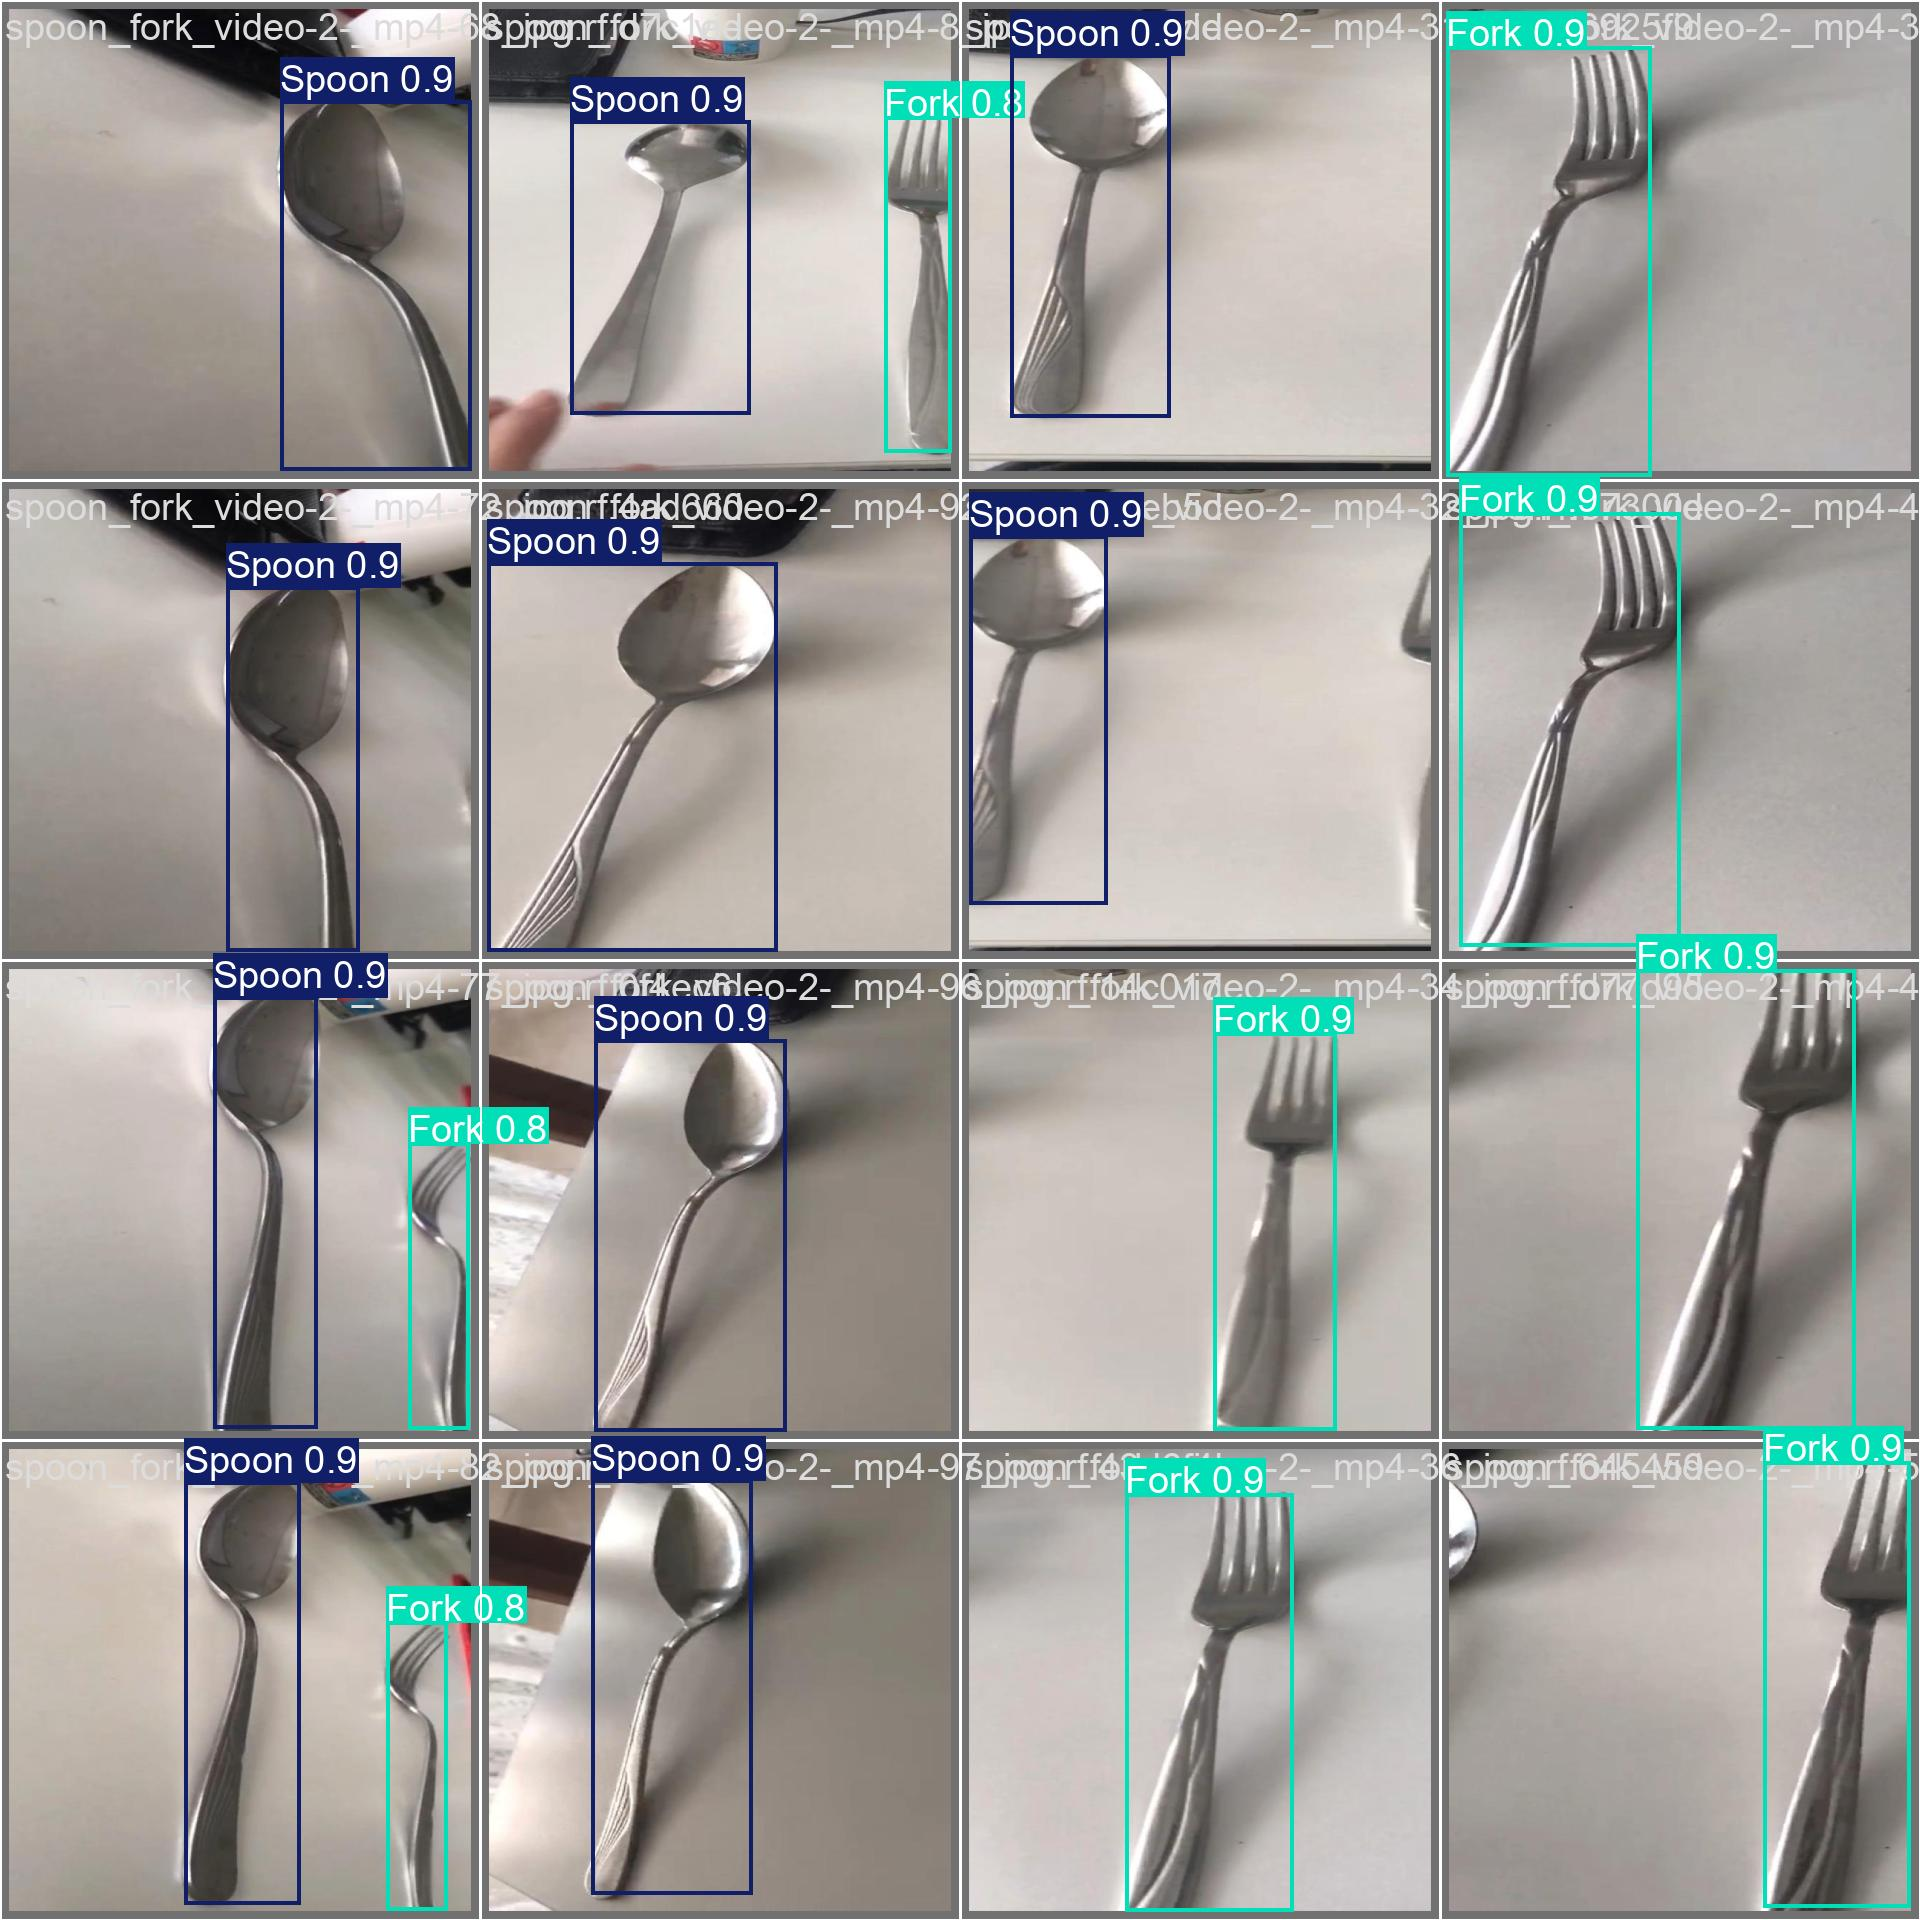

In [ ]:
Image(filename=f'./runs/detect/train2/val_batch0_pred.jpg', width=600)

### Validate custom model

In [ ]:
!yolo task=detect mode=val model='/content/runs/detect/train2/weights/best.pt' data={'/content/drive/MyDrive/ColabNotebooks/Yolov8'}/data.yaml


Ultralytics YOLOv8.2.103 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (NVIDIA L4, 22700MiB)
Model summary (fused): 168 layers, 11,127,519 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/drive/MyDrive/ColabNotebooks/Yolov8/valid/labels.cache... 321 images, 0 backgrounds, 0 corrupt: 100% 321/321 [00:00<?, ?it/s]
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 146, len(boxes) = 409. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 21/21 [00:05<00:00,  3.70it/s]
                   all        321        409      0.909      0.909      0.947      0.758
                 mouse         25         26       0.91      0.776      0.877      0.562
              keyboard         29         29      0.937          1      0.994      0.784
              

### Inference with custom model

In [ ]:
!yolo task=detect mode=predict model='/content/runs/detect/train2/weights/best.pt' conf=0.25 source='/content/drive/MyDrive/ColabNotebooks/Yolov8/test/images' save=True

Ultralytics YOLOv8.2.103 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (NVIDIA L4, 22700MiB)
Model summary (fused): 168 layers, 11,127,519 parameters, 0 gradients, 28.4 GFLOPs

image 1/80 /content/drive/MyDrive/ColabNotebooks/Yolov8/test/images/-1-_jpg.rf.fac8ba637f6bc02e85fbcf28f10c92cd.jpg: 800x800 1 laptop, 8.6ms
image 2/80 /content/drive/MyDrive/ColabNotebooks/Yolov8/test/images/-2-_jpg.rf.339adc07a1eb3d6f00c3eb8f856b3aa9.jpg: 800x800 1 laptop, 7.8ms
image 3/80 /content/drive/MyDrive/ColabNotebooks/Yolov8/test/images/-3-_jpg.rf.7aa765fa537ab66a42615a8049dfce08.jpg: 800x800 1 laptop, 7.5ms
image 4/80 /content/drive/MyDrive/ColabNotebooks/Yolov8/test/images/-30-_jpg.rf.1eb62bd5e229fa19bf00428ae35781ad.jpg: 800x800 1 laptop, 9.8ms
image 5/80 /content/drive/MyDrive/ColabNotebooks/Yolov8/test/images/-36-_jpg.rf.eed726c906f48ec871c521c2f10e5da6.jpg: 800x800 1 laptop, 8.0ms
image 6/80 /content/drive/MyDrive/ColabNotebooks/Yolov8/test/images/-5-_jpg.rf.d65de1bdd88994b27885767d3865bcf6.jpg: 800

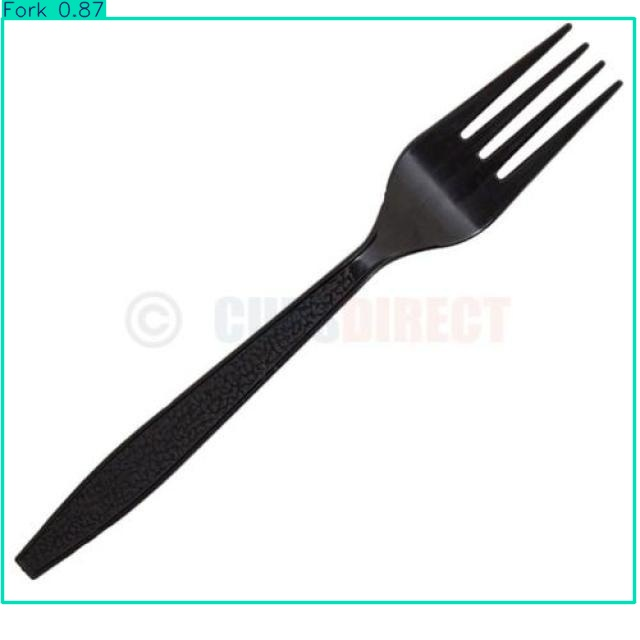

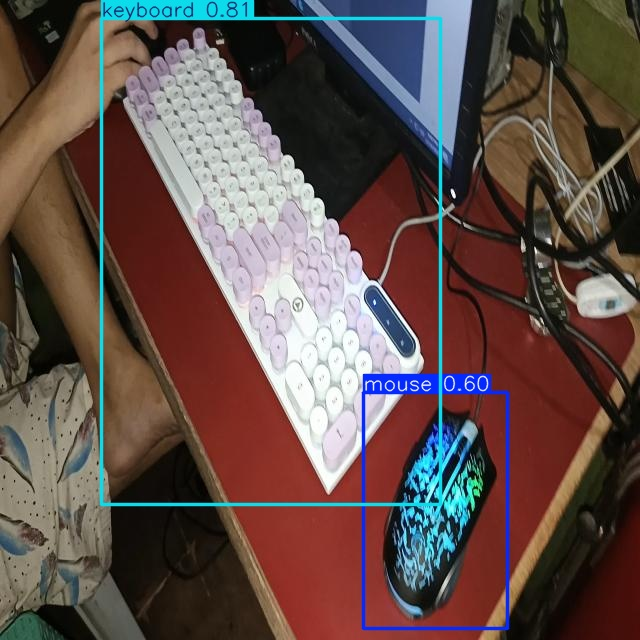

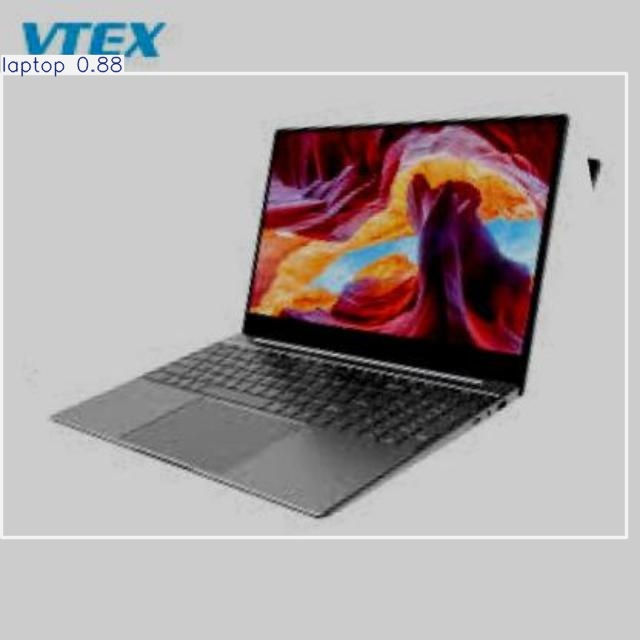

In [ ]:
import glob
from IPython.display import Image, display

# Define the base path where the folders are located
base_path = '/content/runs/detect/'

# List all directories that start with 'predict' in the base path
subfolders = [os.path.join(base_path, d) for d in os.listdir(base_path)
              if os.path.isdir(os.path.join(base_path, d)) and d.startswith('predict')]

# Find the latest folder by modification time
latest_folder = max(subfolders, key=os.path.getmtime)

image_paths = glob.glob(f'{latest_folder}/*.jpg')[:3]

# Display each image
for image_path in image_paths:
    display(Image(filename=image_path, width=600))
    print("\n")

In [ ]:
!cp -r '/content/runs' '/content/drive/MyDrive/ColabNotebooks/Yolov8'

In [ ]:
#https://www.youtube.com/watch?v=QV85eYOb7gk